In [1]:
#Importing the neccessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
#Importing the dataset 
df = pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


AS WE SEE THE DATA IS ALREADY CLEANED THEN WE CAN MOVE TO THE TRAINING THE MODEL

In [9]:
#Extracting the features and target columns 
X = df.iloc[:,:-1]  
y = df.iloc[:,-1]

In [11]:
#Impoting the neccessary methods from the scitit learn library  
from  sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
#Training the model 
model1 = DecisionTreeClassifier()

In [15]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model1.score(X_train,y_train)

1.0

In [19]:
model1.score(X_test,y_test)

0.7165354330708661

In [21]:
y_pred = model1.predict(X_test)

In [22]:
#Building the confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report

In [25]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

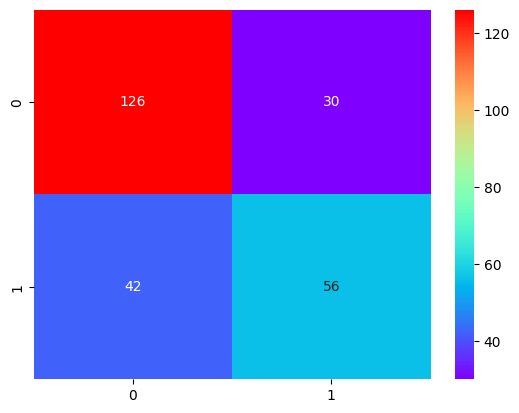

In [28]:
sns.heatmap(cm,annot=True,cmap='rainbow',fmt='d')

When we are using the DecisionTreeClassifier the model undergoes Overfitting

In [29]:
#Now training the another model 
from sklearn.ensemble import RandomForestClassifier

In [30]:
model2 = RandomForestClassifier()

In [31]:
#Fitting the training the data to the model2 
model2.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
model2.score(X_train,y_train)

1.0

In [33]:
model2.score(X_test,y_test)

0.7637795275590551

In [35]:
y_pred_2 = model2.predict(X_test) 

In [36]:
cm2 = confusion_matrix(y_pred_2,y_test) 

<Axes: >

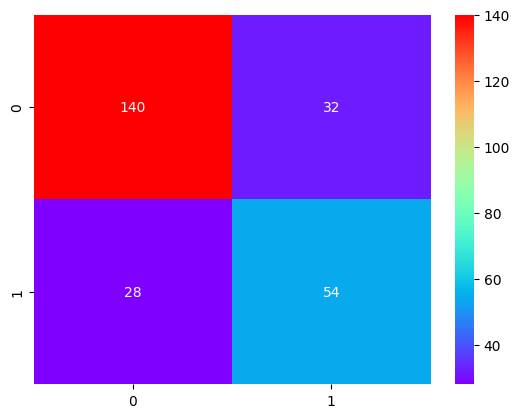

In [38]:
sns.heatmap(cm2,annot=True,cmap='rainbow',fmt='d') 

Now the observation is that accuracy of RandomForestClassifier better than the DecisionTreeClassifier

In [40]:
#Now training the model3 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'C':[0.001,0.001,0.01,0.1,1,10,100,150]}

In [57]:
model3 = LogisticRegression(C=0.01,max_iter=150)

In [58]:
model3.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=150)

In [59]:
model3.score(X_train,y_train)

0.7821011673151751

In [60]:
model3.score(X_test,y_test)

0.7401574803149606

In [61]:
y_pred_3 = model3.predict(X_test)

In [62]:
cm3 = confusion_matrix(y_pred_3,y_test)

<Axes: >

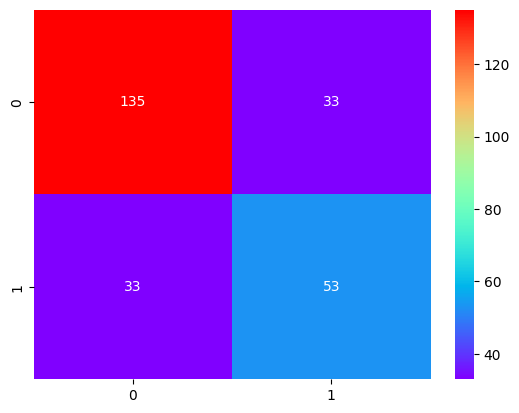

In [64]:
sns.heatmap(cm3,annot=True,cmap='rainbow',fmt='d')